In [ ]:
"""Predicting Solar Intensity Using Weather Data
June 2019
Alex Kim and Dane Stocks
This module defines common utility functions, especially regarding data
cleaning and structuring.
"""
import numpy as np


def read_data(data_paths):
    """Read the data files and combine them into a single dataset.
    Args:
        data_paths (list): Strings of the paths to the data files.
    Returns:
        A single NumPy array consisting of the data from all datasets
    """
    # Read the first data file
    first_path = data_paths[0]
    full_data = np.genfromtxt(first_path, delimiter=',', skip_header=2,
            names=True)

    # Append all remaining data files
    num_files = len(data_paths)
    for i in range(1, num_files):
        path = data_paths[i]
        new_data = np.genfromtxt(path, delimiter=',', skip_header=2,
                names=True)
        full_data = np.hstack((full_data, new_data))

    return full_data


def trim_vars(data):
    """Trim extraneous variables and observations from the data.
    Args:
        data (ndarray): The full unprocessed dataset
    Returns:
        The full dataset with extraneous variables and observations
        trimmed off.
    """
    # Remove all columns with names in `rm_vars`
    rm_vars = ['f0','DHI', 'DNI', 'Clearsky_DHI', 'Clearsky_DNI','Clearsky_GHI', 'Fill_Flag','Global_Horizontal_UV_Irradiance_280400nm','Global_Horizontal_UV_Irradiance_295385nm']
    var_names = list(data.dtype.names)
    keep_vars = [_ for _ in var_names if _ not in rm_vars]
    data_trimmed = data[keep_vars]
    return data_trimmed


def generate_ids(data):
    """Generate a unique ID for each row of the data. Each ID encodes
    the date and time of the solar intensity measurement.
    """
    pass


def recode_time(data):
    """Recode the 'Hour' column to encapsulate both the hour and the
    minute, and then remove the 'Minute' column.
    Args:
        data (ndarray): The full unprocessed dataset
    Returns:
        The full dataset with extraneous variables and observations
    """
    # Recode 'Hour'
    data['Hour'] = data['Hour'] + data['Minute'] / 60

    # Remove 'Minute'
    var_names = list(data.dtype.names)
    keep_vars = [_ for _ in var_names if _ != 'Minute']
    data_trimmed = data[keep_vars]
    return data_trimmed


def featurize(data, n_time_points):
    """
    """
    pass


def cluster_transform():
    """Transform the data for k-means clustering.
    This function generates a transformed dataset where each row
    corresponds to a day, and each column corresponds to a time during
    the day (48 columns total). The cells are populated with solar
    intensity values. All predictor variables (weather data) are ignored
    here.
    Args:
    Returns:
    """


def split_data():
    """
    """
    pass


def read_and_preprocess():
    """
    """
    data_paths = ['https://raw.githubusercontent.com/Ritanjali-Jena/PublicDataSet/weatherdata/2016.csv','https://raw.githubusercontent.com/Ritanjali-Jena/PublicDataSet/weatherdata/2017.csv','https://raw.githubusercontent.com/Ritanjali-Jena/PublicDataSet/weatherdata/2018.csv','https://raw.githubusercontent.com/Ritanjali-Jena/PublicDataSet/weatherdata/2019.csv','https://raw.githubusercontent.com/Ritanjali-Jena/PublicDataSet/weatherdata/2020.csv']
    dat = read_data(data_paths)
    dat = trim_vars(dat)
    dat = recode_time(dat)

    return dat


if __name__ == "__main__":
    pass

In [ ]:
#code to save cleaned and processed combine datafile in local system
#import pandas as pd 
#pd.DataFrame(read_and_preprocess()).to_csv("/Users/ritu/Downloads/weatherdata/processed_combined_sanjose1.csv")

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
nsrdb = read_and_preprocess()#nsrdb has nd array all weather data

In [ ]:
df1 = pd.DataFrame(nsrdb)#converting nd-array to pandas for dataprep

In [ ]:
df1.head(2)

,Year,Month,Day,Hour,GHI,Cloud_Type,Dew_Point,Solar_Zenith_Angle,Surface_Albedo,Wind_Speed,Precipitable_Water,Wind_Direction,Relative_Humidity,Temperature,Pressure
0,2016.0,1.0,1.0,0.0,0.0,1.0,0.0,165.51,0.12,1.0,0.742,72.0,88.77,3.0,1020.0
1,2016.0,1.0,1.0,0.5,0.0,0.0,0.0,165.12,0.12,1.0,0.751,72.0,88.77,2.0,1020.0


In [ ]:
ghi = df1['GHI']#keeping only target(ghi) data here

In [ ]:
ghi.unique()
type(ghi)

array([   0.,   69.,  149., ..., 1044., 1034., 1040.])

In [ ]:
df3 = pd.DataFrame(ghi)
type(df3)

pandas.core.frame.DataFrame

In [ ]:
df3.head()

,GHI
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
#ghi.describe()

In [ ]:
#keeping all feature except ghi in weather variable, # 'Cloud_Type'
weather = df1[['Year', 'Month', 'Day', 'Hour', 'Dew_Point', 'Solar_Zenith_Angle', 'Surface_Albedo', 'Wind_Speed', 'Precipitable_Water', 'Wind_Direction', 'Relative_Humidity', 'Temperature', 'Pressure']]

In [ ]:
weather.head()

,Year,Month,Day,Hour,Dew_Point,Solar_Zenith_Angle,Surface_Albedo,Wind_Speed,Precipitable_Water,Wind_Direction,Relative_Humidity,Temperature,Pressure
0,2016.0,1.0,1.0,0.0,0.0,165.51,0.12,1.0,0.742,72.0,88.77,3.0,1020.0
1,2016.0,1.0,1.0,0.5,0.0,165.12,0.12,1.0,0.751,72.0,88.77,2.0,1020.0
2,2016.0,1.0,1.0,1.0,0.0,162.22,0.12,1.0,0.760,73.1,88.62,2.0,1020.0
3,2016.0,1.0,1.0,1.5,0.0,157.79,0.12,1.0,0.766,73.1,95.25,2.0,1020.0
4,2016.0,1.0,1.0,2.0,0.0,152.57,0.12,1.0,0.773,65.4,94.70,2.0,1020.0


In [ ]:
#weather['Cloud_Type'] = weather['Cloud_Type'].replace([1.0, 0.0],['Cloudy','Clear'])

In [ ]:
#data normalization on weather data
scaler = MinMaxScaler()
scaler.fit(weather)
weather_norm=scaler.transform(weather)

In [ ]:
#normalized features in nd arrays
weather_norm

array([[0.        , 0.        , 0.        , ..., 0.88005981, 0.07239819,
        0.63829787],
       [0.        , 0.        , 0.        , ..., 0.88005981, 0.04977376,
        0.63829787],
       [0.        , 0.        , 0.        , ..., 0.87845776, 0.04977376,
        0.63829787],
       ...,
       [1.        , 1.        , 1.        , ..., 0.86008758, 0.20588235,
        0.72340426],
       [1.        , 1.        , 1.        , ..., 0.96486169, 0.19230769,
        0.72340426],
       [1.        , 1.        , 1.        , ..., 0.95791947, 0.19457014,
        0.72340426]])

In [ ]:
#converting nd array into pandas data frame for data prep
wq =pd.DataFrame(weather_norm)
type(wq)

pandas.core.frame.DataFrame

In [ ]:
wq.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,0.000000,0.429825,0.996317,0.2,0.126582,0.110320,0.200000,0.880060,0.072398,0.638298
1,0.0,0.0,0.0,0.021277,0.429825,0.993752,0.2,0.126582,0.112151,0.200000,0.880060,0.049774,0.638298
2,0.0,0.0,0.0,0.042553,0.429825,0.974679,0.2,0.126582,0.113983,0.203056,0.878458,0.049774,0.638298
3,0.0,0.0,0.0,0.063830,0.429825,0.945544,0.2,0.126582,0.115205,0.203056,0.949268,0.049774,0.638298
4,0.0,0.0,0.0,0.085106,0.429825,0.911213,0.2,0.126582,0.116629,0.181667,0.943394,0.049774,0.638298


In [ ]:
#combining normalized features and non-normalized target ghi
frames = [wq, df3]
combined_data = pd.concat(frames,axis=1)
type(frames)

list

In [ ]:
combined_data.tail(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,GHI
87681,1.0,1.0,1.0,0.702128,0.684211,0.470635,0.4,0.126582,0.264604,0.950000,0.776888,0.280543,0.723404,34.0
87682,1.0,1.0,1.0,0.723404,0.637427,0.505426,0.4,0.139241,0.244250,0.961111,0.728613,0.264706,0.723404,4.0
87683,1.0,1.0,1.0,0.744681,0.637427,0.540480,0.4,0.113924,0.223896,0.538889,0.733846,0.262443,0.723404,0.0
87684,1.0,1.0,1.0,0.765957,0.634503,0.576784,0.4,0.101266,0.223896,0.116667,0.725943,0.262443,0.723404,0.0
87685,1.0,1.0,1.0,0.787234,0.634503,0.614009,0.4,0.101266,0.203542,0.183333,0.725943,0.262443,0.723404,0.0
87686,1.0,1.0,1.0,0.808511,0.625731,0.652022,0.4,0.113924,0.183187,0.247222,0.712699,0.260181,0.702128,0.0
87687,1.0,1.0,1.0,0.829787,0.625731,0.690628,0.4,0.088608,0.162833,0.319444,0.702446,0.264706,0.702128,0.0
87688,1.0,1.0,1.0,0.851064,0.614035,0.729628,0.4,0.075949,0.162833,0.394444,0.676493,0.269231,0.702128,0.0
87689,1.0,1.0,1.0,0.872340,0.614035,0.768826,0.4,0.088608,0.162833,0.500000,0.701485,0.257919,0.702128,0.0
87690,1.0,1.0,1.0,0.893617,0.616959,0.807958,0.4,0.101266,0.162833,0.608333,0.723379,0.248869,0.702128,0.0


In [ ]:
combined_data.GHI.unique()

array([   0.,   69.,  149., ..., 1044., 1034., 1040.])

In [ ]:
combined_data['GHI'].isnull().values.sum()

0

In [ ]:
combined_data.GHI.shape
type(combined_data)

pandas.core.frame.DataFrame

In [ ]:
#converting the final combined data into numpy array
final_data = combined_data.to_numpy()
type(final_data)

numpy.ndarray

In [ ]:
final_data 

array([[0.        , 0.        , 0.        , ..., 0.07239819, 0.63829787,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04977376, 0.63829787,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04977376, 0.63829787,
        0.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.20588235, 0.72340426,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.19230769, 0.72340426,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.19457014, 0.72340426,
        0.        ]])

### weather_norm is normalized data except target(GHI), ghi is target feature with non normalized
### x_train, y_train dataset will use to train the model to get f(X), 
### Y_test is actual ghi which will be used to compare with predicted ghi value, 
### x_test will be used to get the prediction, 
### model error = y_test-predicted


# Modeling

In [ ]:
#split data
#x_train, y_train dataset to train the model, x_test will give prediction, y_test is actual and we compare y_test-x_test to get error
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(weather_norm, ghi, test_size = 0.4, random_state = 5)
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",Y_train.shape)
print("y_text shape",Y_test.shape)

x_train shape (52617, 13)
x_test shape (35079, 13)
y_train shape (52617,)
y_text shape (35079,)


In [ ]:
print(Y_test)

1640       0.0
77136      0.0
45768    914.0
31261     18.0
46407      0.0
         ...  
11697    381.0
77635    810.0
20266      0.0
20365      0.0
36253      0.0
Name: GHI, Length: 35079, dtype: float64


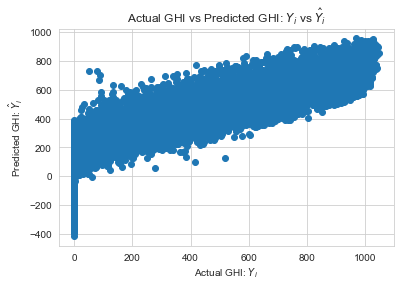

In [ ]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual GHI: $Y_i$")
plt.ylabel("Predicted GHI: $\hat{Y}_i$")
plt.title("Actual GHI vs Predicted GHI: $Y_i$ vs $\hat{Y}_i$")
plt.show()

## Actual ghi 200 predicting it from 100 to 500, actual is 1000 predicting it as 400 to 1000

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


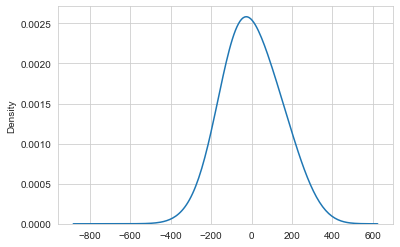

In [ ]:
#delta_y is Actual GHI - Predicted GHI
delta_y = Y_test - Y_pred
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

## Error distribution
### delta_y is error, plotting the error distribution to see where maximum error points lie, the mean of error points lies around -10, maximum error is -10

In [ ]:
#Here for each data point we are getting actual vs predicted
delta_y

1640     -15.098181
77136    -57.122118
45768    132.085241
31261   -162.553167
46407   -151.439381
            ...    
11697    -22.352034
77635    282.003288
20266     58.066991
20365    -92.912482
36253   -100.990363
Name: GHI, Length: 35079, dtype: float64

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


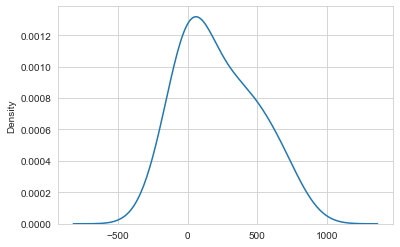

In [ ]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

## Actual distribution
###  We need to align error distribution and actual distribution for best model by doing feature engineering. 

In [ ]:
from sklearn import metrics
#MAE
print("Model MAE", metrics.mean_absolute_error(Y_test, Y_pred))

#MSE
print("Model MSE", metrics.mean_squared_error(Y_test, Y_pred))

#RMSE
print("Model RMSE",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Model MAE 110.0717215792884
Model MSE 18537.769956457334
Model RMSE 136.15347941370186


In [ ]:
from sklearn.metrics import r2_score 
 
R_square = r2_score(Y_test, Y_pred) 
print('Coefficient of Determination R2', R_square) 

Coefficient of Determination R2 0.7994574229451131
